# TESTY
Odwzorowanie wykresu nr 4 z publikacji Katza:
https://www.researchgate.net/publication/245355607_Calculation_of_the_Aerodynamic_Forces_on_Automotive_Lifting_Surfaces.

Dane na tym wykresie podane  jako referecnja [10] pochodzą z publikacji: "Calculated loadings due to incidence of a number of straight and swept-back wings", V.M. Falker 1948:
https://reports.aerade.cranfield.ac.uk/handle/1826.2/3122?show=full

Porwównania w tym notebooku będą dla tabeli 24 z powyższego artykułu.

In [1]:
import numpy as np

AR = 4
half_wing_span = 0.5
sweep_angle_deg = 45.
chord_length = (2 * half_wing_span) / AR
AoA_deg = 4.

# dcl/dalpha
a_ref = 3.039
# eta = 2y/b, b= 2 * half_winf_span
x_good = np.array([0., 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0])
# Cll/Cl local lift coefficient
y_good = np.array([0.964, 0.984, 1.018, 1.045, 1.068, 1.101, 1.123, 1.132, 1.119, 1.072, 0.966, 0.752, 0.557, 0.])


# 126-vortex 6 point standart solution modified: auxiliary siolution
n_spanwise = len(y_good) # 14
n_chordwise = int(126 / n_spanwise) # 1 
#  Co oznacza 6 point???

cav = chord_length # for sweep wing: are of wing = b * c, average chord is equal to chord length

In [2]:
# varaibles.py for jupyter
import os
import numpy as np
import time


mgirths =  np.array([0.00, 1./8, 1./4, 1./2, 3./4, 7./8, 1.00])
mchords = np.array([chord_length]* len(mgirths))

   
output_args = {
    'case_name': 'my_case_name',  # get name of the current file
    'case_dir': os.path.abspath(''), # get dir of the current file
    'name': os.path.join("results_example_jib_and_mainsail_vlm", time.strftime("%Y-%m-%d_%Hh%Mm%Ss")),
    'file_name': 'my_fancy_results', # name of xlsx excel file
}

solver_args = {
    'n_spanwise': n_spanwise,# No of control points (above the water) per sail, recommended: 50
    'n_chordwise': n_chordwise, # No of control points (above the water) per sail, recommended: 50
    'interpolation_type': "linear",  # either "spline" or "linear"
}

conditions_args = {
    'leeway_deg': 0.,    # [deg]
    'heel_deg': 0.,     # [deg]
    'SOG_yacht': 0.,   # [m/s] yacht speed - speed over ground (leeway is a separate variable)
    'tws_ref': 1.0,     # [m/s] true wind speed
    'alpha_true_wind_deg': AoA_deg,   # [deg] true wind angle (with reference to course over ground) => Course Wind Angle to the boat track = true wind angle to centerline + Leeway
    'reference_water_level_for_wind_profile': -0.,  # [m] this is an attempt to mimick the deck effect
    # by lowering the sheer_above_waterline
    # while keeping the wind profile as in original geometry
    # this shall be negative (H = sail_ctrl_point - water_level)
    'wind_exp_coeff': 0.,  # [-] coefficient to determine the exponential wind profile
    'wind_reference_measurment_height': 10.,  # [m] reference height for exponential wind profile
    'rho': 1.,  # air density [kg/m3]
    'wind_profile': 'flat', # allowed: 'exponential' or 'flat' or 'logarithmic'
    'roughness': 0.05, # for logarithmic profile only 
}


rig_args = {
    'main_sail_luff': half_wing_span / np.cos(np.deg2rad(sweep_angle_deg)),  # [m]
    'jib_luff': 10.0,  # [m]
    'foretriangle_height': 11.50,  # [m]
    'foretriangle_base': 3.90,  # [m]
    'sheer_above_waterline': 0.,#[m]
    'boom_above_sheer': 0., # [m],
    'rake_deg': 90. + sweep_angle_deg,  # rake angle [deg]
    'mast_LOA': 0.,  # [m]
    'sails_def': 'main', # definition of sail set, possible: 'jib' or 'main' or 'jib_and_main'
}


# INFO for camber:
# First digit describing maximum camber as percentage of the chord.
# Second digit describing the distance of maximum camber from the airfoil leading edge in tenths of the chord.
main_sail_args = {
    'girths' : mgirths,
    'chords': mchords,
    'centerline_twist_deg': 0*mgirths,
    'camber': 0*np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]),
    'camber_distance_from_luff': np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
}
 
# not used in this example becouse sails_def is only main
jgirths = np.array([0.00, 1./4, 1./2, 3./4, 1.00])
jib_sail_args = {
    'centerline_twist_deg': 0*(10+5)  + 0*15. * jgirths,
    'girths': jgirths,
    'chords': 0* np.array([3.80, 2.98, 2.15, 1.33, 0.5]),
    'camber': 0*np.array([0.01, 0.01, 0.01, 0.01, 0.01]),
    'camber_distance_from_luff': np.array([0.5, 0.5, 0.5, 0.5, 0.5]), # starting from leading edge   
}        

# REFERENCE CSYS
# The origin of the default CSYS is located @ waterline level and aft face of the mast
# The positive x-coord: towards stern
# The positive y-coord: towards leeward side
# The positive z-coord: above the water
# To shift the default CSYS, adjust the 'reference_level_for_moments' variable.
# Shifted CSYS = original + reference_level_for_moments
# As a results the moments will be calculated around the new origin.

# yaw_reference [m] - distance from the aft of the mast towards stern, at which the yawing moment is calculated.
# sway_reference [m] - distance from the aft of the mast towards leeward side. 0 for symmetric yachts ;)
# heeling_reference [m] - distance from the water level,  at which the heeling moment is calculated.
csys_args = {
    'reference_level_for_moments': np.array([0, 0, 0]),  # [yaw_reference, sway_reference, heeling_reference]
}

# GEOMETRY OF THE KEEL
# to estimate heeling moment from keel, does not influence the optimizer.
# reminder: the z coord shall be negative (under the water)
keel_args={
    'center_of_lateral_resistance_upright': np.array([0, 0, -1.0]),  # [m] the coordinates for a yacht standing in upright position
}  


<div class="alert alert-block alert-warning">
<b>Run cell below twice:</b> Run cell below twice before running other cells. Output below is expected to always appear at first time importing pySailingVLM:
<br><br>
    
<em>   
/home/user/miniconda3/envs/mgr_test/lib/python3.10/site-packages/numba/core/lowering.py:107: NumbaDebugInfoWarning: Could not find source for function: <function __numba_array_expr_0x7f01d6a1e9e0 at 0x7f01d6cfa680>. Debug line information may be inaccurate.warnings.warn(NumbaDebugInfoWarning(msg))
</em> 
<br>
</div>

In [3]:
import shutil
from pySailingVLM.rotations.csys_transformations import CSYS_transformations
from pySailingVLM.yacht_geometry.hull_geometry import HullGeometry
from pySailingVLM.results.save_utils import save_results_to_file
from pySailingVLM.solver.panels_plotter import display_panels_xyz_and_winds
from pySailingVLM.results.inviscid_flow import InviscidFlowResults
from pySailingVLM.solver.vlm import Vlm
from pySailingVLM.runner.sail import Wind, Sail
from pySailingVLM.runner.container import Output, Rig, Conditions, Solver, MainSail, JibSail, Csys, Keel

from pySailingVLM.solver.panels_plotter import plot_cp

In [4]:
import numpy as np
from pySailingVLM.solver.coefs import get_vlm_Cxyz

C = []
# dcl/dalpha
a_vlm = []

out = Output(**output_args)
conditions = Conditions(**conditions_args)
solver = Solver(**solver_args)
main = MainSail(**main_sail_args)
jib = JibSail(**jib_sail_args)
csys = Csys(**csys_args)
keel = Keel(**keel_args)
rig = Rig(**rig_args)
csys_transformations = CSYS_transformations(conditions.heel_deg, conditions.leeway_deg, v_from_original_xyz_2_reference_csys_xyz=csys.reference_level_for_moments)


w = Wind(conditions)
s = Sail(solver, rig, main, jib, csys_transformations)
sail_set = s.sail_set
myvlm = Vlm(sail_set.panels, solver.n_chordwise, solver.n_spanwise, conditions.rho, w.profile, sail_set.trailing_edge_info, sail_set.leading_edge_info)

height = 1.0
# array with Cxyz per sail
sails_Cxyz = myvlm.get_Cxyz(w, height)
 
for idx, Cxyz in enumerate(sails_Cxyz):
    a = Cxyz[1] / np.deg2rad(AoA_deg)
    C.append(Cxyz[1])
    a_vlm.append(a)


In [5]:
print(f"dcl\dalpha:\t {a_vlm[0]}\t theory: {a_ref}") # dla n_chordwise = 1 wynik jest zblizony do teorii, 
# jak jest więcej paneli chordiwe to bardziej odvhodzimy od prawdy. Dlaczego ????


dcl\dalpha:	 3.05782126705488	 theory: 3.039


# UWAGA
Należy zerknąc do książki Aerodynamics for engineers John J.Bertin p 368 (Example 7.2).
Równanie 7.51 oraz 7.52. Opisane jest tam jak liczyc współczynniki cl dla danego panelu, jeżeli mamy n_chordise = 1 oraz więcej.
Sprawdziłam wcześniej, że wyniki dla n_chordwise = 1 zgadzają się z tym co jest w książce. Priblem pojawia się jak jest więcej paneli w chorwise direction. Poniżej próbuję zaimplementować wzory 7.51 i 7.52 tak jak to opisał Bertin:

"When panels extend from leading edge to trailing edge, such as in the case for the 4x1 lattice shown in Fig 7.31, the value of $\Gamma$ given in equation (7.48) is used in equation (7.51). When there are a number of discrete panels in the chordwise direction, such as 10x4 lattice shown in Fig. 7.24, you should sum (from leading edge to the trailing edge) the values of $\Gamma$ for those bound-vortex filaments at the spanwise location (i.e. in the chordwise strip) of interest..."


Rozumiem to tak, że siatkę paneli dzielimy na paski wzdłuż chordwise direction. Pasków tych jest tyle ile wynosi n_spanwise. Następnie dla każdego paska sumujemy $\Gamma$ i liczymy wartości $\frac{C_l c}{c_{av}}$ zgodnie ze wzorem 7.52. Następnie kreślimy wykres $\frac{C_l}{C_L}$ versus $\frac{2y}{b}$.

Jeżeli się mylę, proszę o wskazanie jak interpretowac cytat.

In [6]:
#from pySailingVLM.solver import coefs, velocity
V = np.array(w.profile.get_true_wind_speed_at_h(1.0))

gammas_above = np.split(myvlm.gamma_magnitude, 2)[0]
# gsec[0] gammas for fisrt section along chordwise direction
gsec = gammas_above.reshape(solver.n_chordwise, solver.n_spanwise).transpose()

# sum off gammas per section
gsum_sec = np.sum(gsec, axis=1)
cl = gsum_sec * 2 / (cav * np.linalg.norm(V))

In [7]:
y_data = cl / C[0] # czy dzielę przez odpowiednią liczbę?
ctrp_above = np.split(myvlm.ctr_p, 2)[0]
# ułoeznei w ctr_p w myvlm: ctr_p od 0 do panelu na wysokości n_spanwise (kolumna 1), potem w kolumnie 2 ...
# biorę współrzędną ztową (bo y-ki są zerami) z punktu ctr_p dla leading edge tylko:
x_data = 2 * ctrp_above[0:n_spanwise][:, 2] / (2*half_wing_span) # 2y/b

In [8]:
from pySailingVLM.solver.panels_plotter import plot_cp
plot_cp(sail_set.zero_mesh, myvlm.p_coeffs, out.name)

Loading BokehJS ...

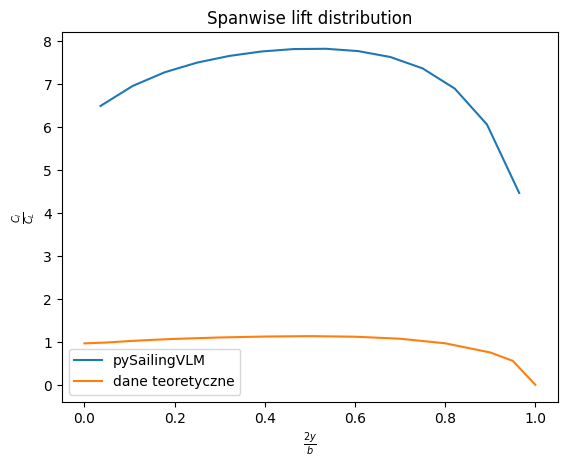

In [9]:
# importing matplotlib module
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_data, y_data, color='tab:blue', label='pySailingVLM')
ax.plot(x_good, y_good, color='tab:orange', label='dane teoretyczne')

ax.set_xlabel(r"$\frac{2y}{b}$")
ax.set_ylabel(r"$\frac{C_{l}}{C_{L}}$")
ax.set_title("Spanwise lift distribution")
ax.legend()   
#plt.savefig('fig_name')

# UWAGA
Wykresy pySailingVLM oraz danych teoretycznych w miarę się pokrywają jak n_chordwise jest równe 1. Proszę to przetestować. Jak jest więcej paneli w kierunku chordwise to wykres jest tak jakby przeskalowany, kształt zachowuje plus minus odpowiedni.

Domyślam się że może mieć to związek z tym jak jest liczony współczynnik cl dla stripa. Może złe gammy sumuję, albo należy od nowa coś przeliczyć...